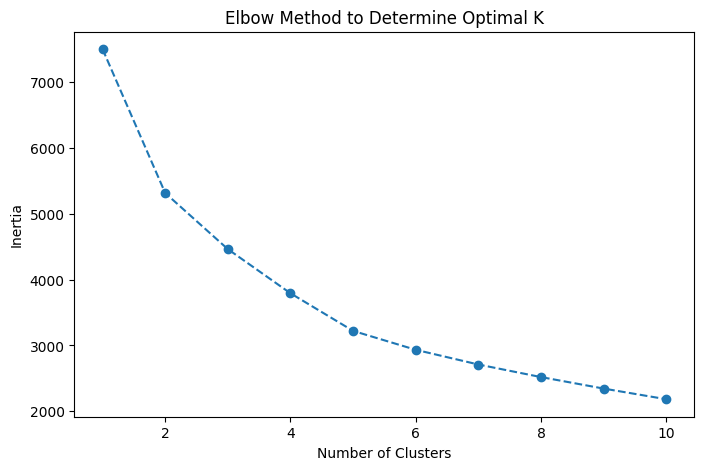

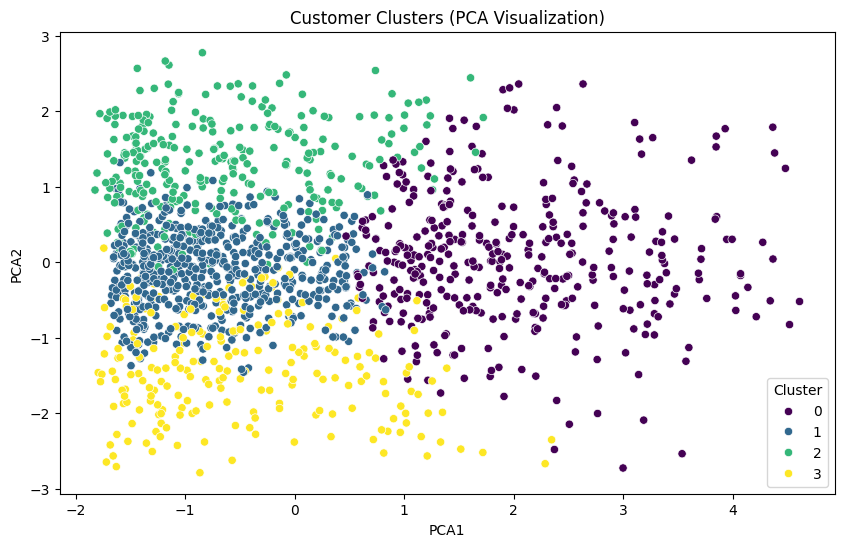

         Total_Spend  Purchase_Frequency  Average_Spend_Per_Visit  \
Cluster                                                             
0        2913.374800                 1.0              2913.374800   
1         722.560000                 1.0               722.560000   
2         860.811966                 1.0               860.811966   
3        1017.169414                 1.0              1017.169414   

         Time_Spent_Minutes  Decision_Time_Minutes  Loyalty_Points_Earned  
Cluster                                                                    
0                 34.373333              15.864000              18.165333  
1                 28.809211              10.166118              19.065789  
2                 34.267797              36.562712              16.054237  
3                 89.522523              13.229730              16.432432  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

categorical_cols = ['Gender', 'Age_Group', 'Customer_Type', 'Store_Location', 'Payment_Method',
                    'Item_Category', 'Day_of_Week', 'Online_or_Offline', 'Purchase_Type']
df = pd.read_csv('realistic_supermart.csv')

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


features = ['Total_Spend', 'Purchase_Frequency', 'Average_Spend_Per_Visit',
            'Time_Spent_Minutes', 'Decision_Time_Minutes', 'Loyalty_Points_Earned']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df)
plt.title("Customer Clusters (PCA Visualization)")
plt.show()


print(df.groupby('Cluster')[features].mean())

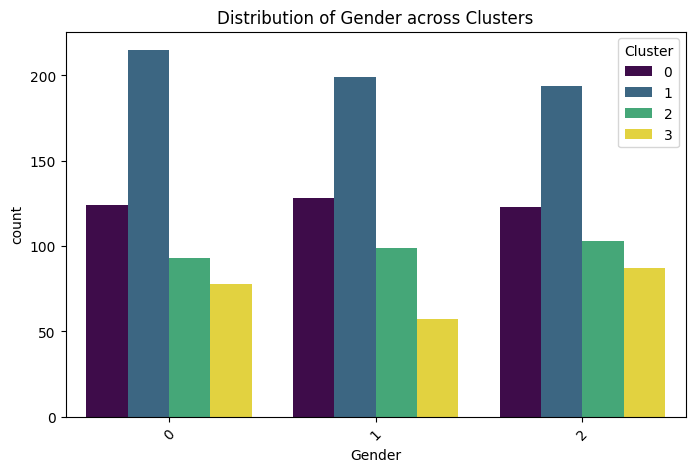

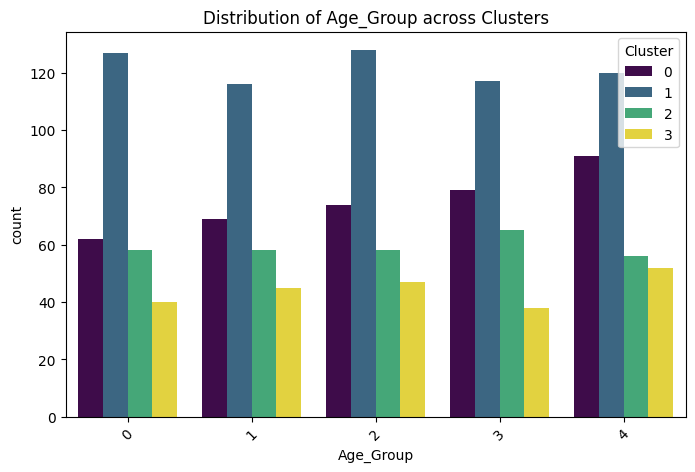

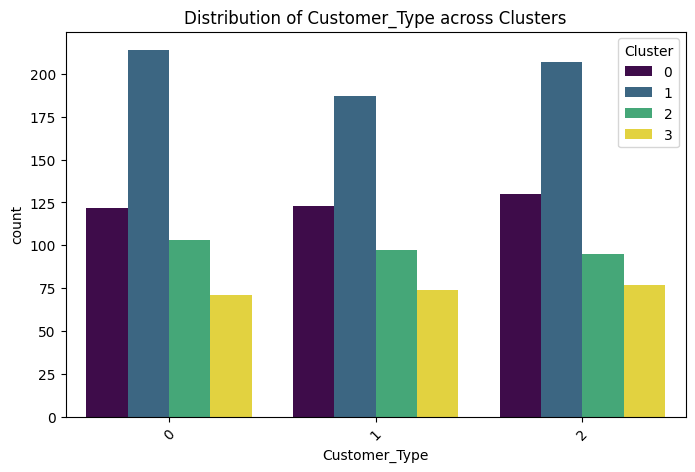

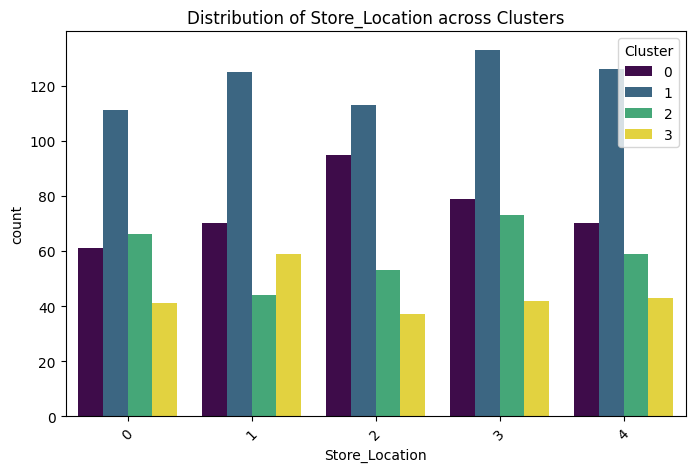

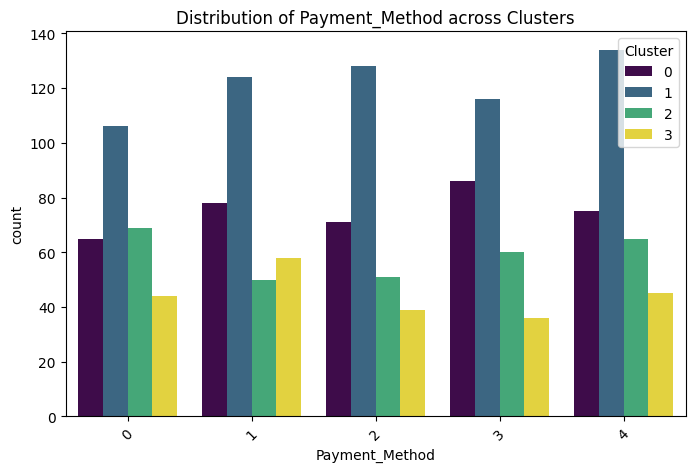

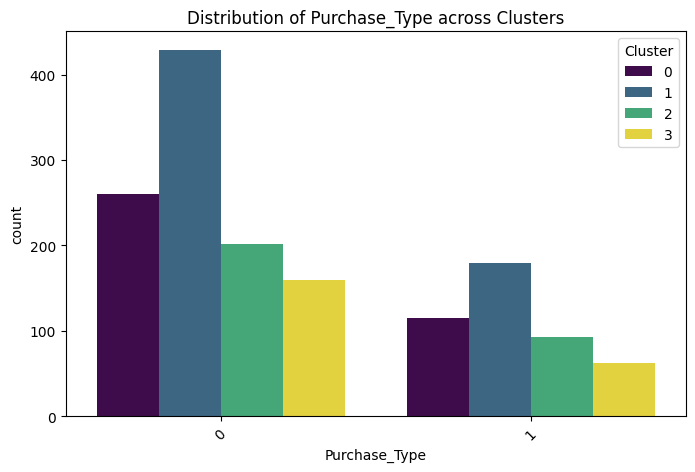

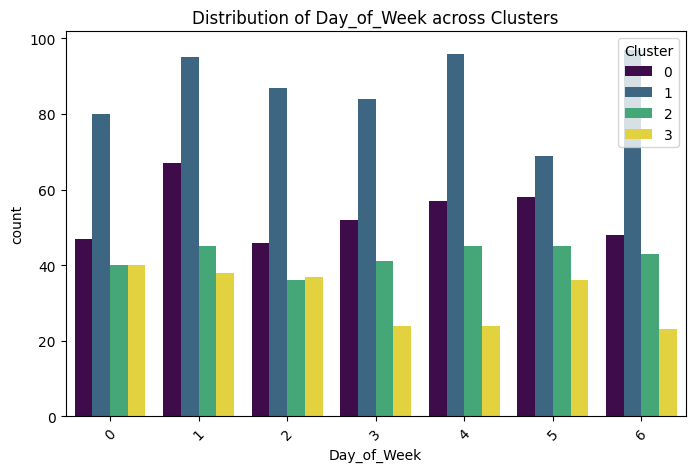

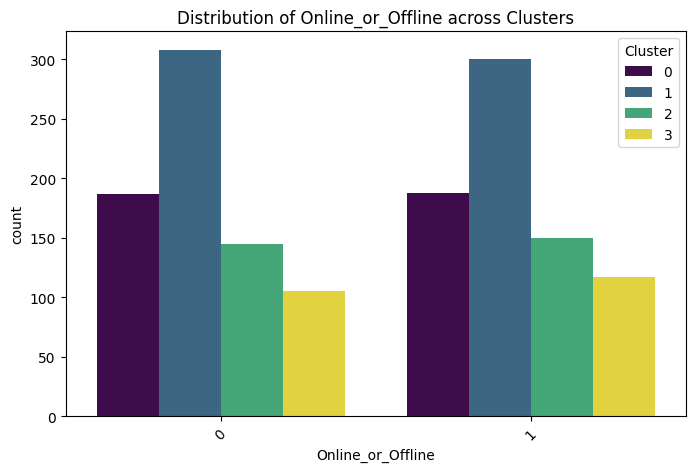

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




categorical_cols = ["Gender", "Age_Group", "Customer_Type", "Store_Location",
                    "Payment_Method", "Purchase_Type", "Day_of_Week", "Online_or_Offline"]
for col in categorical_cols:
    df[col] = df[col].astype("category")



for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue="Cluster", data=df, palette="viridis")
    plt.title(f"Distribution of {col} across Clusters")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.show()
